<a href="https://colab.research.google.com/github/ta1231/ML_Practice/blob/main/BostonHousing_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
BostonHousing = pd.read_csv("/content/BostonHousingData.csv", encoding='utf-8')

In [ ]:
features=BostonHousing.iloc[:, 0:13]
flist=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
BostonHousing_data=pd.DataFrame(BostonHousing.iloc[:,0:13], columns=flist)
country=list(BostonHousing['Class'])

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree


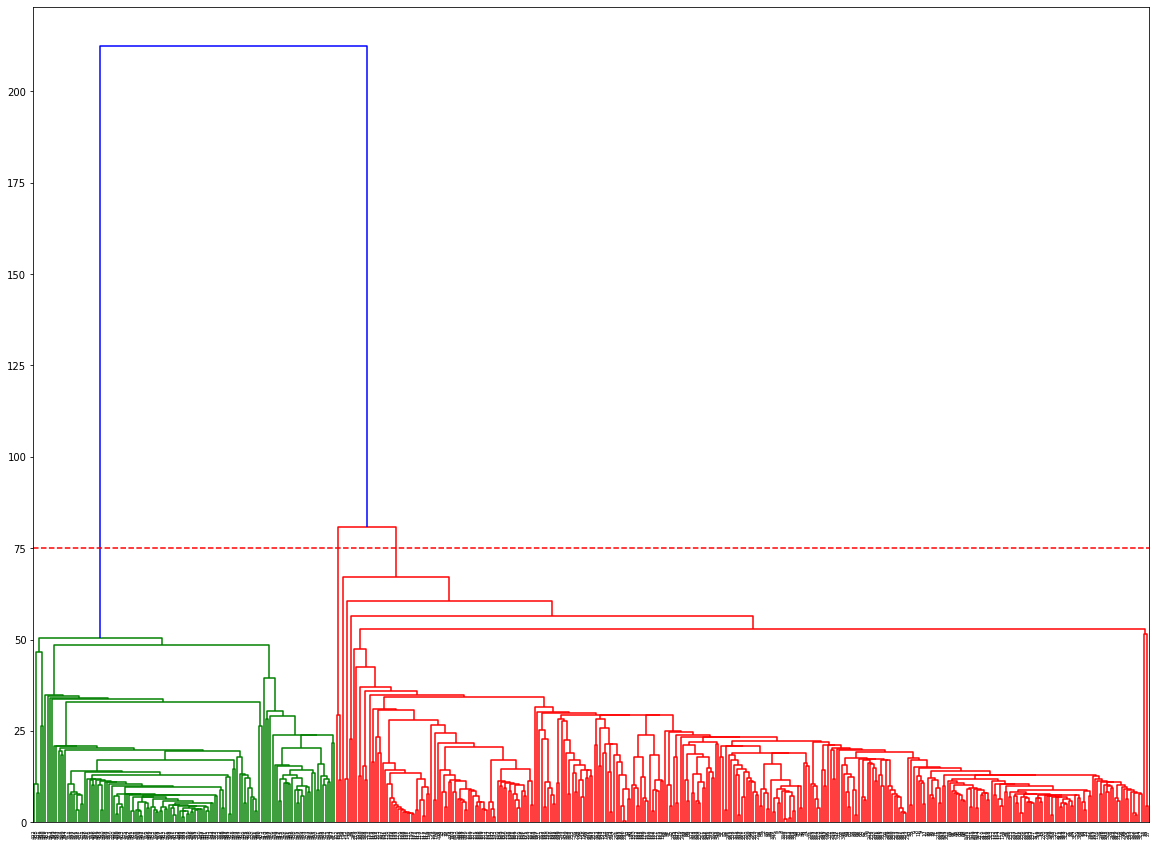

In [ ]:
#single
Z_single = linkage(BostonHousing_data, 'single')

fig = plt.figure(figsize=(20, 15))
dn = dendrogram(Z_single)
plt.axhline(75, color = 'r', ls = '--')
plt.show()

In [ ]:
cut_single = cut_tree(Z_single, 3)

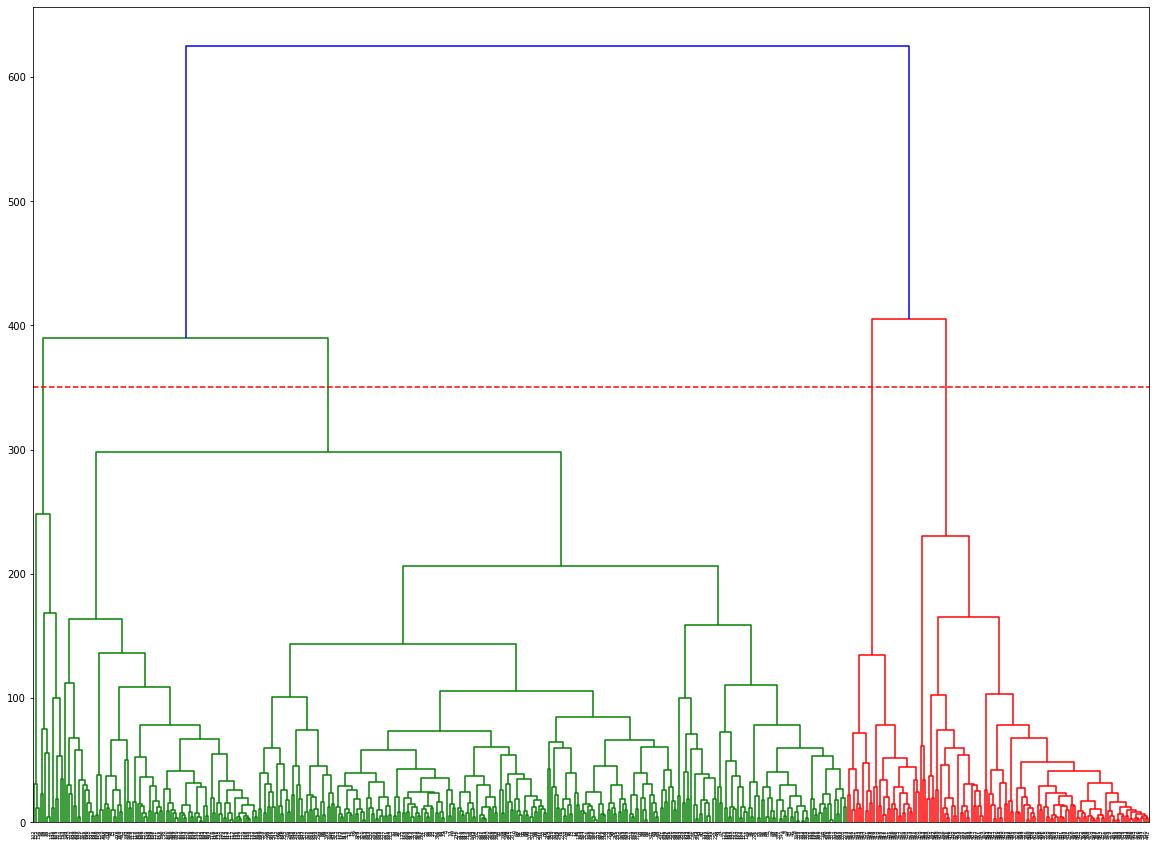

In [ ]:
#complete
Z_complete = linkage(BostonHousing_data, 'complete')

fig = plt.figure(figsize=(20, 15))
dn = dendrogram(Z_complete)
plt.axhline(350, color = 'r', ls = '--')
plt.show()

In [ ]:
cut_complete = cut_tree(Z_complete, 4)

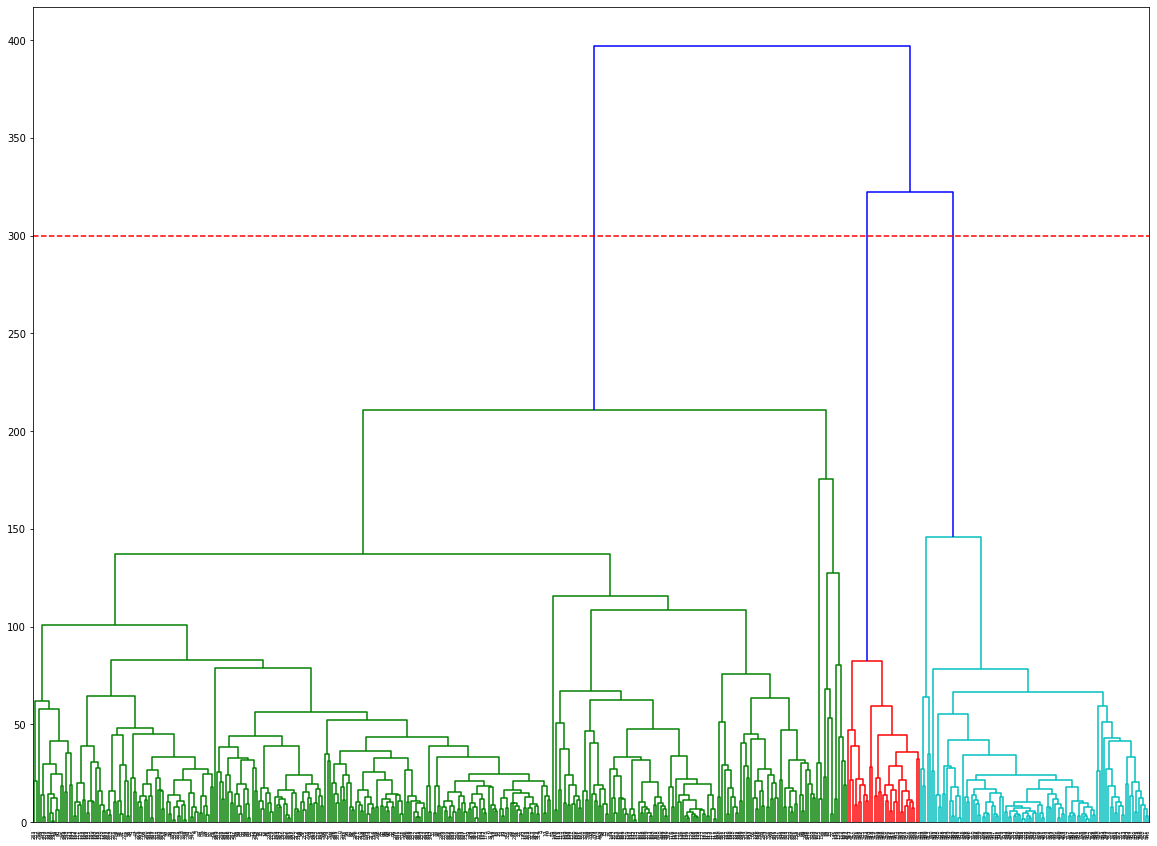

In [ ]:
#average
Z_average = linkage(BostonHousing_data, 'average')

fig = plt.figure(figsize=(20, 15))
dn = dendrogram(Z_average)
plt.axhline(300, color = 'r', ls = '--')
plt.show()

In [ ]:
cut_average = cut_tree(Z_average, 2)

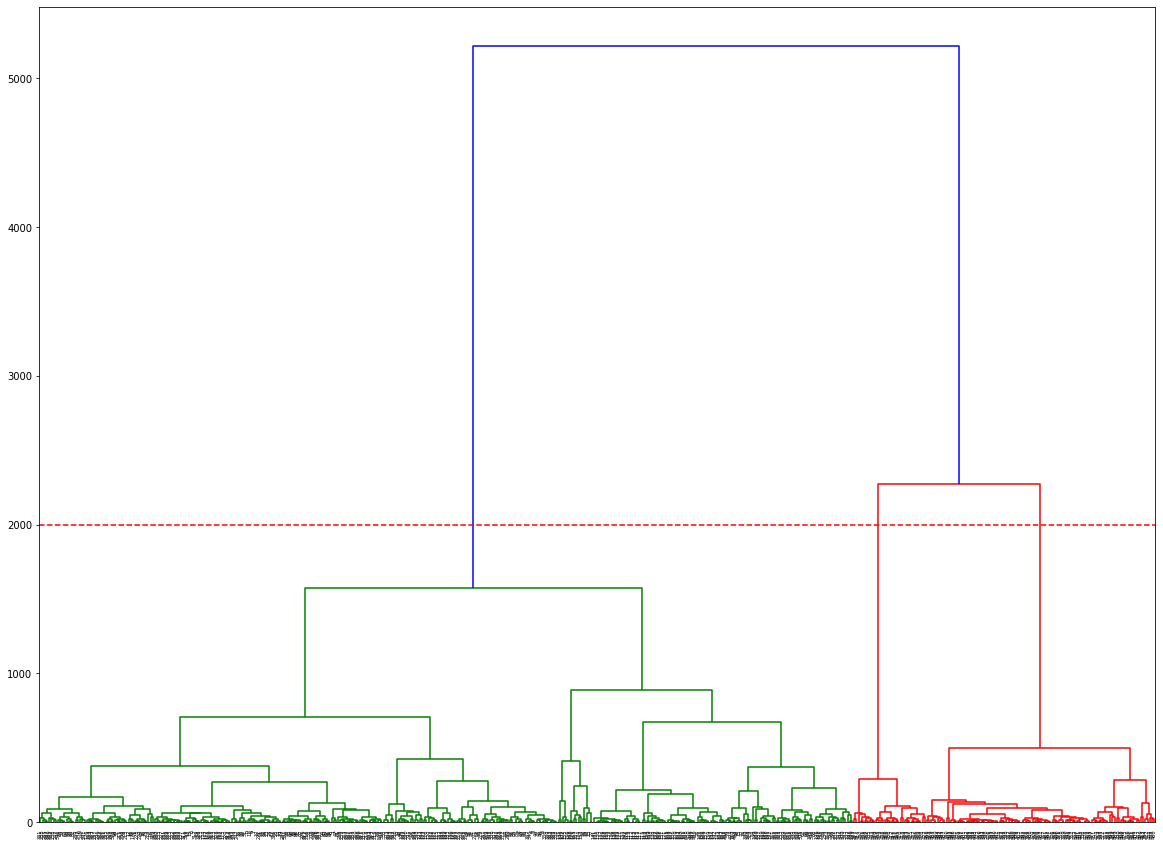

In [ ]:
#ward's
Z_ward = linkage(BostonHousing_data, 'ward')

fig = plt.figure(figsize=(20, 15))
dn = dendrogram(Z_ward)
plt.axhline(2000, color = 'r', ls = '--')
plt.show()

In [ ]:
cut_ward = cut_tree(Z_ward, 3)


In [ ]:
#정규화 
from sklearn.preprocessing import StandardScaler
BostonHousing_data_stdz = StandardScaler().fit_transform(BostonHousing_data)

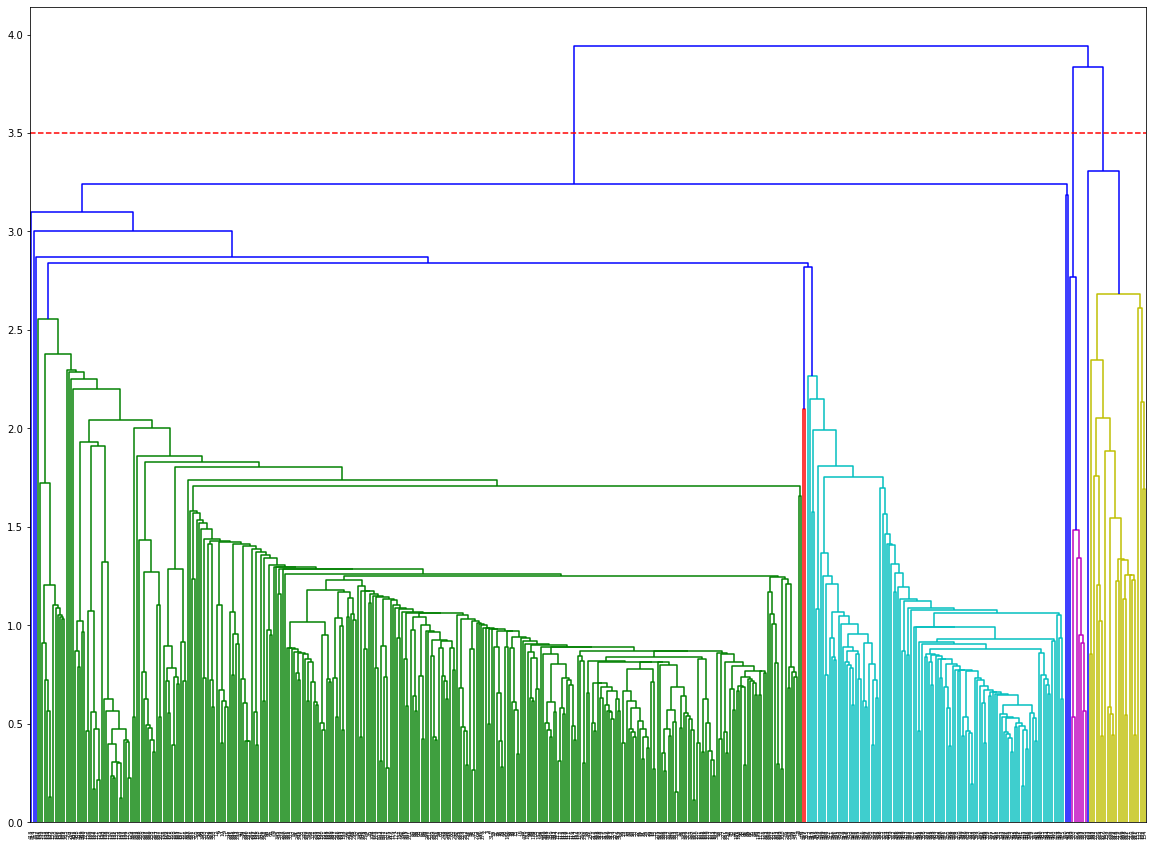

In [ ]:
#single
Z_stdz_single = linkage(BostonHousing_data_stdz, 'single')

fig = plt.figure(figsize=(20, 15))
dn = dendrogram(Z_stdz_single)
plt.axhline(3.5, color = 'r', ls = '--')
plt.show()


In [ ]:
cut_single_std = cut_tree(Z_stdz_single, 3)


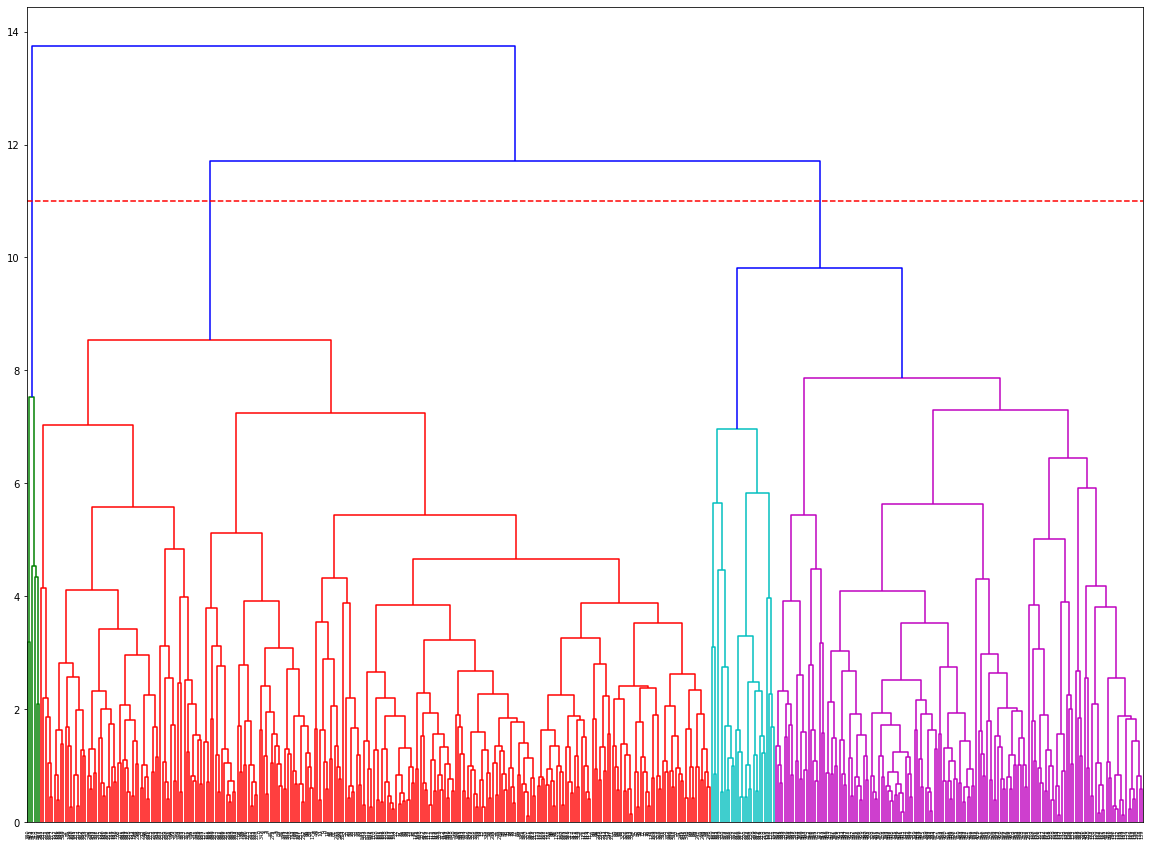

In [ ]:
#complete
Z_stdz_complete = linkage(BostonHousing_data_stdz, 'complete')

fig = plt.figure(figsize=(20, 15))
dn = dendrogram(Z_stdz_complete)
plt.axhline(11, color = 'r', ls = '--')
plt.show()

In [ ]:
cut_complete_std = cut_tree(Z_stdz_complete, 3)

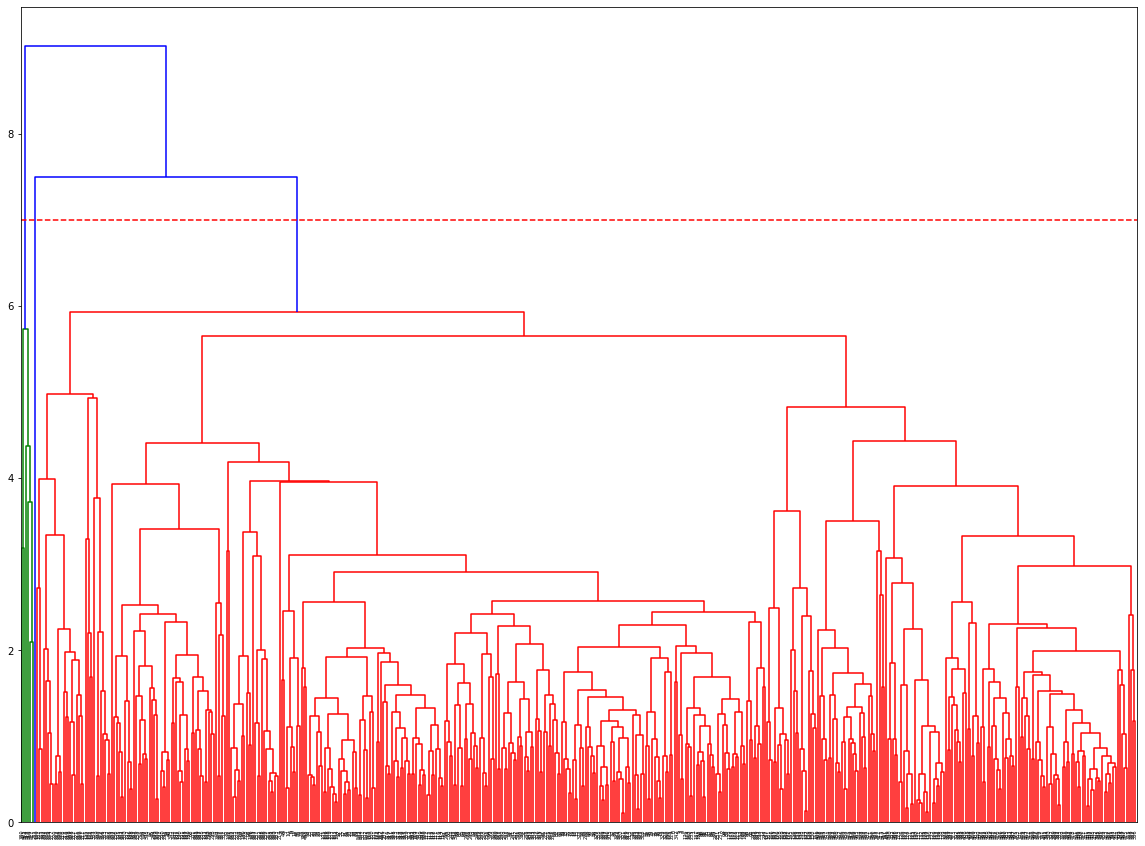

In [ ]:
#average
Z_stdz_average = linkage(BostonHousing_data_stdz, 'average')

fig = plt.figure(figsize=(20, 15))
dn = dendrogram(Z_stdz_average)
plt.axhline(7, color = 'r', ls = '--')
plt.show()

In [ ]:
cut_average_std = cut_tree(Z_stdz_average, 2)


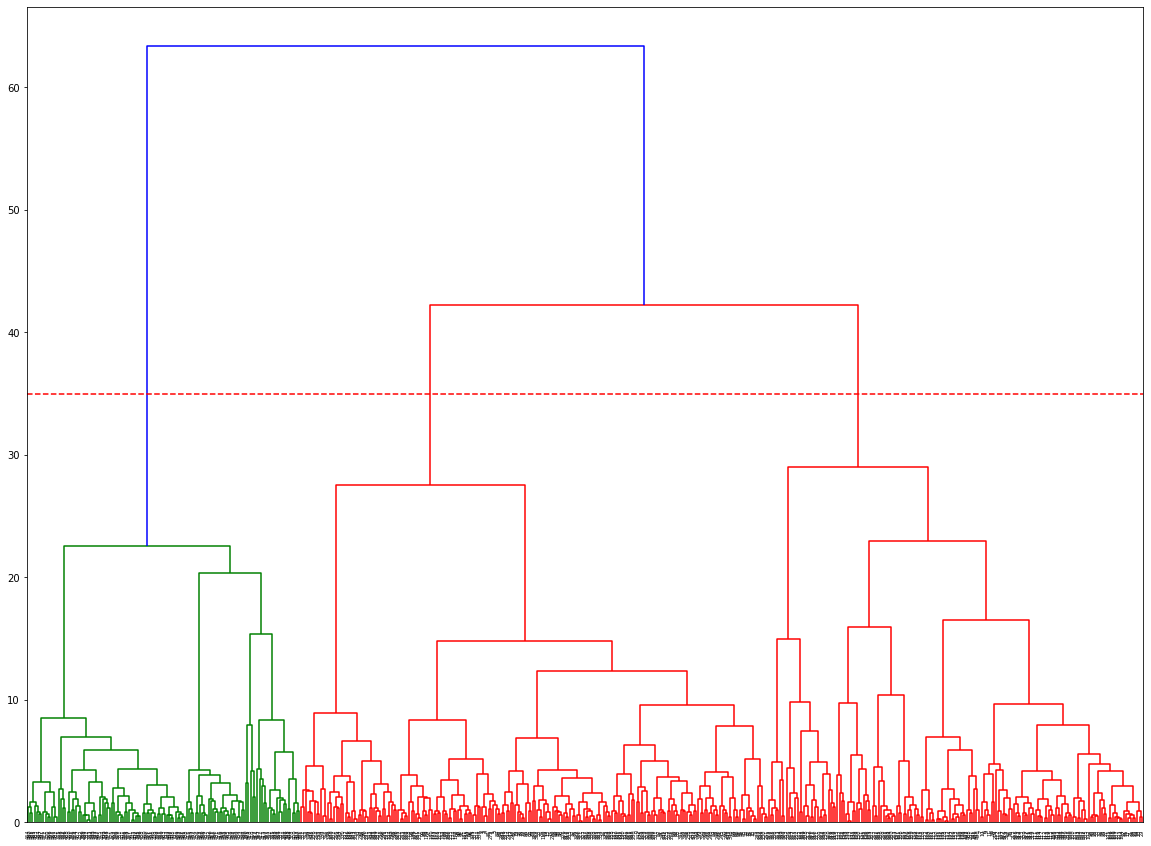

In [ ]:
#ward's
Z_stdz_ward = linkage(BostonHousing_data_stdz, 'ward')

fig = plt.figure(figsize=(20, 15))
dn = dendrogram(Z_stdz_ward)
plt.axhline(35, color = 'r', ls = '--')
plt.show()

In [ ]:
cut_ward_std = cut_tree(Z_stdz_ward, 3)


In [ ]:
# Non-hierarchical (k-means)
from sklearn.cluster import KMeans

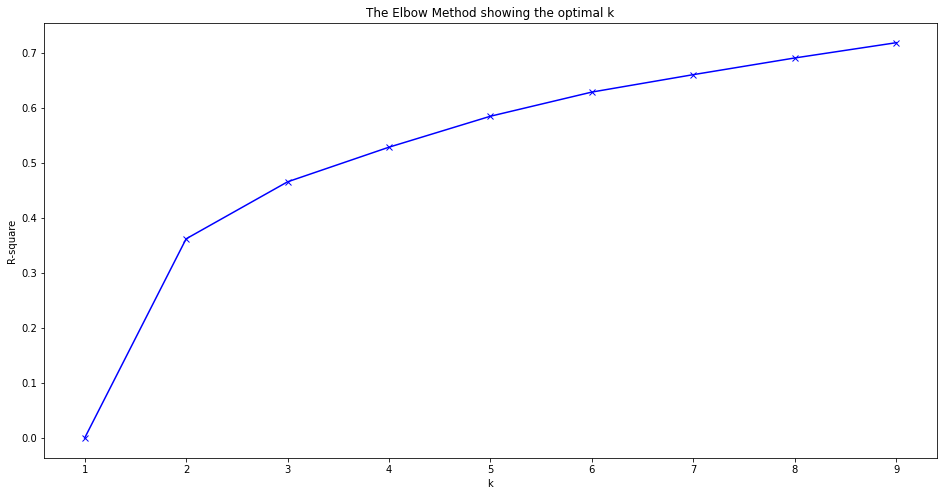

In [ ]:
Tss = np.sum((BostonHousing_data_stdz-BostonHousing_data_stdz.mean(0))**2)
R_square = []
K = range(1,10)
for k in K:
    Model = KMeans(n_clusters=k)
    Model.fit(BostonHousing_data_stdz)
    Wss = Model.inertia_
    Bss = Tss-Wss
    R_square.append(Bss/Tss)
    
plt.figure(figsize=(16,8))
plt.plot(K, R_square, 'bx-')
plt.xlabel('k')
plt.ylabel('R-square')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
#model

kmeansModel = KMeans(n_clusters=3)
kmeansModel.fit(BostonHousing_data_stdz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#%% PC1 vs PC2 Plot
from sklearn.decomposition import PCA

pca_corr = PCA()
pca_corr.fit(BostonHousing_data_stdz)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca_corr_=pca_corr.fit_transform(BostonHousing_data_stdz)[:,0:2]


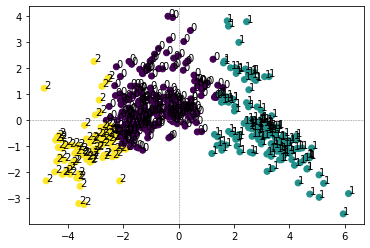

In [ ]:
plt.scatter(pca_corr_[:,0],pca_corr_[:,1], c = kmeansModel.labels_)
for i, txt in enumerate(kmeansModel.labels_):
    plt.annotate(txt, (pca_corr_[i,0], pca_corr_[i,1]))
plt.axhline(y=0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(x=0, color='gray', linewidth=0.5, linestyle='--')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


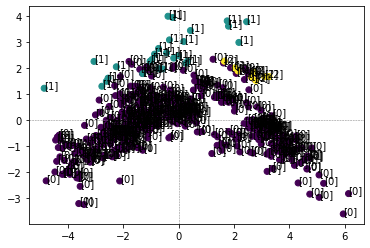

In [ ]:
plt.scatter(pca_corr_[:,0],pca_corr_[:,1], c = cut_single_std)
for i, txt in enumerate(cut_single_std):
    plt.annotate(txt, (pca_corr_[i,0], pca_corr_[i,1]))
plt.axhline(y=0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(x=0, color='gray', linewidth=0.5, linestyle='--')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


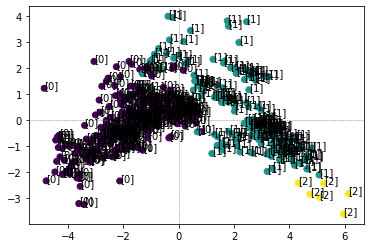

In [ ]:
plt.scatter(pca_corr_[:,0],pca_corr_[:,1], c = cut_complete_std)
for i, txt in enumerate(cut_complete_std):
    plt.annotate(txt, (pca_corr_[i,0], pca_corr_[i,1]))
plt.axhline(y=0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(x=0, color='gray', linewidth=0.5, linestyle='--')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


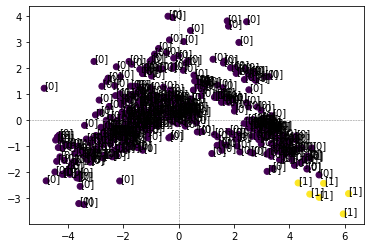

In [ ]:
plt.scatter(pca_corr_[:,0],pca_corr_[:,1], c = cut_average_std)
for i, txt in enumerate(cut_average_std):
    plt.annotate(txt, (pca_corr_[i,0], pca_corr_[i,1]))
plt.axhline(y=0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(x=0, color='gray', linewidth=0.5, linestyle='--')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


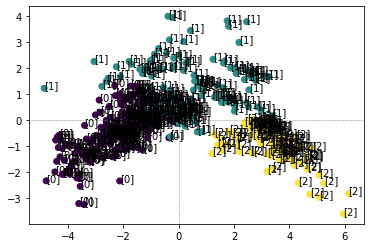

In [ ]:
plt.scatter(pca_corr_[:,0],pca_corr_[:,1], c = cut_ward_std)
for i, txt in enumerate(cut_ward_std):
    plt.annotate(txt, (pca_corr_[i,0], pca_corr_[i,1]))
plt.axhline(y=0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(x=0, color='gray', linewidth=0.5, linestyle='--')
plt.show()

In [ ]:
result_Ward = pd.concat([BostonHousing, pd.DataFrame(cut_ward_std, columns=['Cluster'])], axis=1)
Profiles_Ward = result_Ward.groupby('Cluster').mean()

In [ ]:
result_Ward

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Class,Cluster
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,High,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,Low,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,High,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,High,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,Low,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,Low,1
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,High,1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,Low,1


In [ ]:
Profiles_Ward

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
Cluster,,,,,,,,,,,,,,
0,0.138718,24.457547,5.355472,0.000000,0.454900,6.527580,43.151415,5.554284,4.419811,293.386792,17.774057,389.373066,7.582830,26.707547
1,0.947149,3.323529,13.267353,0.205882,0.595329,6.200853,84.847647,2.856153,5.405882,363.447059,18.032941,369.938529,14.220353,22.501176
2,13.209833,0.000000,18.100000,0.000000,0.669605,5.984137,89.731452,2.074494,24.000000,666.000000,20.200000,282.584032,19.172823,15.438710
